<a href="https://colab.research.google.com/github/Chum4k3r/ex_eletroacusticaI/blob/main/EA_EX4_ElementosAcusticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
l = 0.05  # m
a = 57.15e-5  # m
lc = 0.61*a  # correção de comprimento equivalente para tubo não flangeado
llinha = l + lc

S = np.pi * a**2
V = S * llinha

rho0 = 1.21  # kg/m³
c0 = 343  # m/s
Zar = rho0 * c0

eta = 1.85e-5

f = np.linspace(1, 10000, 10000, dtype='float32')   # espaço de frequências
omega = lambda x: 2*np.pi*x  # freq angular
decibel = lambda sinal: 10 * np.log10((sinal**2))  # magnitude
deg = lambda ang: 180 * ang / np.pi
rad = lambda ang: np.pi * ang / 180

# Tubo aberto-fechado

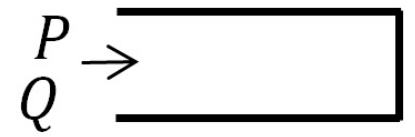

> # $C_{a} = \large\frac{\pi a^{2}l'}{\rho_{0}c_{0}^2}$ 
> # $M_{a} = \large\frac{\rho_{0}l'}{3\pi a^{2}}$ 

### Para Baixas frequências

> # $Z_{a} = (\text{j}\omega C_{a})^{-1}$

### Para Altas frequências

> # $Z_{a} = (\text{j}\omega C_{a})^{-1} + \text{j}\omega M_{a}$

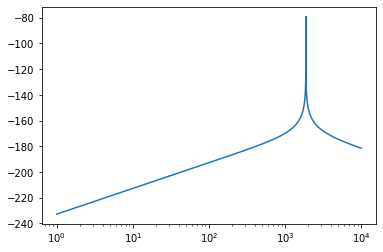

In [ ]:
Caaf = V / (Zar * c0)
Maaf = (rho0 * llinha) / (3 * S)

Zaaf = (1j * omega(f) * Caaf)**(-1) + 1j * omega(f) * Maaf

plt.semilogx(f, decibel(1/np.abs(Zaaf)))

# Tubo aberto-aberto

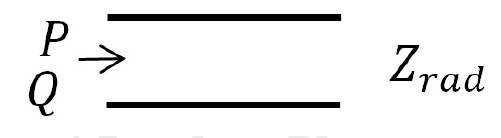

> # $R_{a} = \large\frac{8\eta l}{\pi a^{4}}$ 
> # $M_{a} = \large\frac{\rho_{0}l'}{3\pi a^{2}}$ 

### Para tubos medianos

> # $Z_{a} = \text{j}\omega M_{a}$

### Para tubos pequenos

> # $Z_{a} = Ra + 4\text{j}\omega M_{a}$

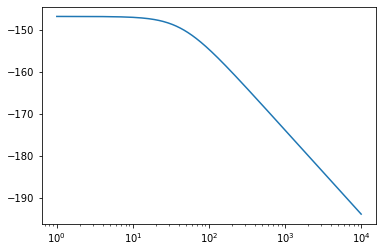

In [ ]:
Raaa = (8 * eta * l) / (S * a * a)

Zaaa = Raaa + 4 * 1j * omega(f) * Maaf

plt.semilogx(f, decibel(1/np.abs(Zaaa)))

# Placa microperfurada

### $a \xrightarrow{}$ raio dos furos

### $b \xrightarrow{}$ distancia entre os furos

### $S \xrightarrow{}$ área da placa

### $l \xrightarrow{}$ profundidade, ou comprimento, da placa



> # $\psi = \large\frac{\pi a^2}{b^2}$
> # $y = 2a\sqrt{\large\frac{\omega\rho_{0}}{4\eta}}$
> # $R_{a} = \large\frac{32\eta l}{S\psi(2a)^{2}}\left[\left(1 + \frac{y^2}{32}\right)^{0.5} + \frac{\sqrt{2}}{32}y\frac{2a}{l}\right]$
> # $M_{a} = \large\frac{\rho_{0} l}{S\psi} \left[1 + \left(1 + \frac{y^2}{2}\right)^{-0.5} + 0.85\frac{2a}{l}\right]$

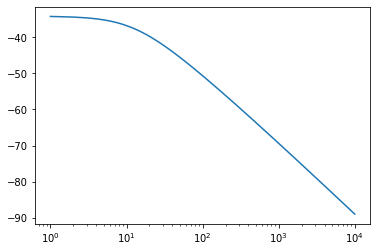

In [ ]:
a = 1e-3 # 1 mm
b = 6e-3 # 5 mm
l = 30e-3 # 3 cm
S = 1  # 1 m²

psi = np.pi * a * a / (b * b)

y = 2 * a * (omega(f) * rho0 / (4 * eta))**0.5

Rampp = ((32 * eta * l)/(S * psi * 4 * a * a)) * ((1 + (y * y)/32)**0.5 + (2**0.5 / 32) * y * (2 * a / l) )

Mampp = ((rho0 * l) / (S * psi)) * (1 + (1 + y**2 / 2)**-0.5 + 0.85*(2*a/l))

Zampp = Rampp + 1j * omega(f) * Mampp

plt.semilogx(f, decibel(1/np.abs(Zampp)))